<a href="https://colab.research.google.com/github/MuktoFlame/ML-Journey/blob/main/Linear_Regression_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the data from a URL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
from urllib.request import urlretrieve

In [ ]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7dafcf604040>)

In [ ]:
medical_df = pd.read_csv('medical.csv')

### Data Visualization

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
fig = px.histogram(medical_df,
                  x='age',
                  marginal='box',
                  nbins=47,
                  title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                  x='children',
                  marginal='box',
                  nbins=47,
                  title='Distribution of Children')
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                  x='bmi',
                  marginal='box',
                  color_discrete_sequence=['red'],
                  title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

Charges

In [ ]:
fig = px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  nbins=47,
                  title='Distribution of Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  color='smoker',
                  color_discrete_sequence=['green', 'grey'],
                  title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  color='sex',
                  color_discrete_sequence=['green', 'grey'],
                  title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  color='region',
                  color_discrete_sequence=['green', 'grey', 'red', 'blue'],
                  title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Smoker

In [ ]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
fig = px.histogram(medical_df,
                  x='smoker',
                  marginal='box',
                  color='sex',
                  color_discrete_sequence=['green', 'blue'],
                  title='Smoker')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                  x='smoker',
                  marginal='box',
                  color='region',
                  color_discrete_sequence=['green', 'blue', 'red', 'grey'],
                  title='Smoker')
fig.update_layout(bargap=0.1)
fig.show()

Age and Charges

In [ ]:
fig = px.histogram(medical_df,
                  x='age',
                  y='charges',
                  marginal='box',
                  color='sex',
                  color_discrete_sequence=['green', 'grey'],
                  title='Charges')
fig.update_layout(bargap=0.1)
fig.update_layout(
    width=1000,  # Set the width of the graph
    height=600   # Set the height of the graph
)
fig.show()

In [ ]:
fig = px.scatter(medical_df,
                x='age',
                y='charges',
                color='smoker',
                hover_data=['sex'],
                title= 'Age vs. Charges')
fig.update_traces(marker_size=5)
fig.update_layout(
    width=1000,  # Set the width of the graph
    height=600   # Set the height of the graph
)
fig.show()

BMI and Charges

In [ ]:
fig = px.scatter(medical_df,
                x='bmi',
                y='charges',
                color='smoker',
                hover_data=['sex', 'age'],
                title= 'BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.update_layout(
    width=1000,  # Set the width of the graph
    height=600   # Set the height of the graph
)
fig.show()

For discrete number
- Violin function gives good visualization
- Barplot only shows the highest value

In [ ]:
px.violin(medical_df, x='children', y='charges').update_layout(width=1000, height=600 )

<Axes: xlabel='children', ylabel='charges'>

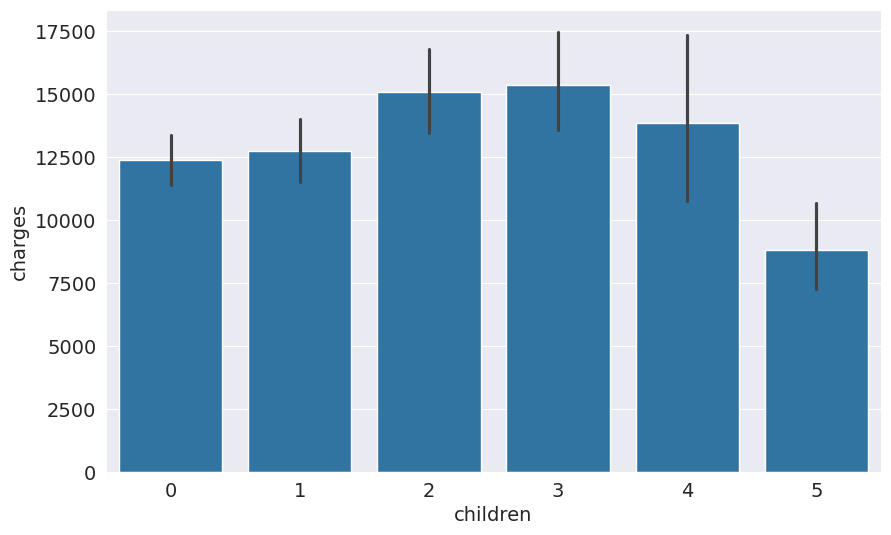

In [ ]:
sns.barplot(medical_df, x='children', y='charges')

In [ ]:
px.violin(medical_df, x='sex', y='charges').update_layout(width=1000, height=600 )

<Axes: xlabel='sex', ylabel='charges'>

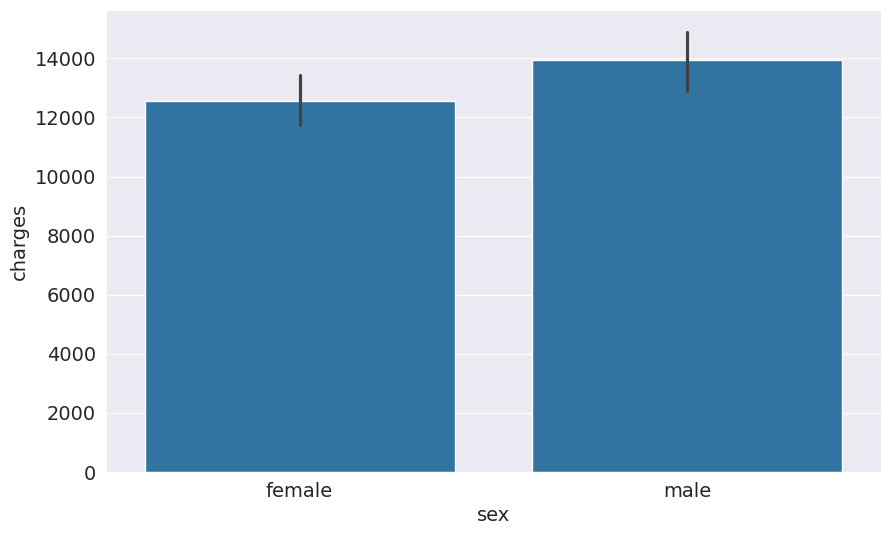

In [ ]:
sns.barplot(medical_df, x='sex', y='charges')

In [ ]:
px.violin(medical_df, x='region', y='charges').update_layout(width=1000, height=600 )

<Axes: xlabel='region', ylabel='charges'>

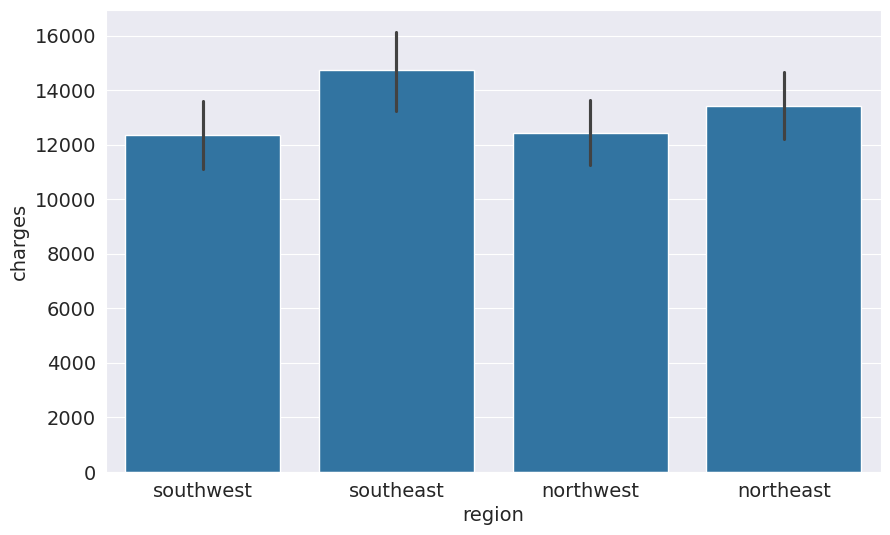

In [ ]:
sns.barplot(medical_df, x='region', y='charges')

### Correlation

In [ ]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [ ]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [ ]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [ ]:
# Remove non-numeric columns
numeric_df = medical_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


In [ ]:
# Convert categorical columns to numeric using one-hot encoding
medical_df_encoded = pd.get_dummies(medical_df)

# Calculate the correlation matrix
corr_matrix = medical_df_encoded.corr()
print(corr_matrix)

                       age       bmi  children   charges  sex_female  \
age               1.000000  0.109272  0.042469  0.299008    0.020856   
bmi               0.109272  1.000000  0.012759  0.198341   -0.046371   
children          0.042469  0.012759  1.000000  0.067998   -0.017163   
charges           0.299008  0.198341  0.067998  1.000000   -0.057292   
sex_female        0.020856 -0.046371 -0.017163 -0.057292    1.000000   
sex_male         -0.020856  0.046371  0.017163  0.057292   -1.000000   
smoker_no         0.025019 -0.003750 -0.007673 -0.787251    0.076185   
smoker_yes       -0.025019  0.003750  0.007673  0.787251   -0.076185   
region_northeast  0.002475 -0.138156 -0.022808  0.006349    0.002425   
region_northwest -0.000407 -0.135996  0.024806 -0.039905    0.011156   
region_southeast -0.011642  0.270025 -0.023066  0.073982   -0.017117   
region_southwest  0.010016 -0.006205  0.021914 -0.043210    0.004184   

                  sex_male  smoker_no  smoker_yes  region_north

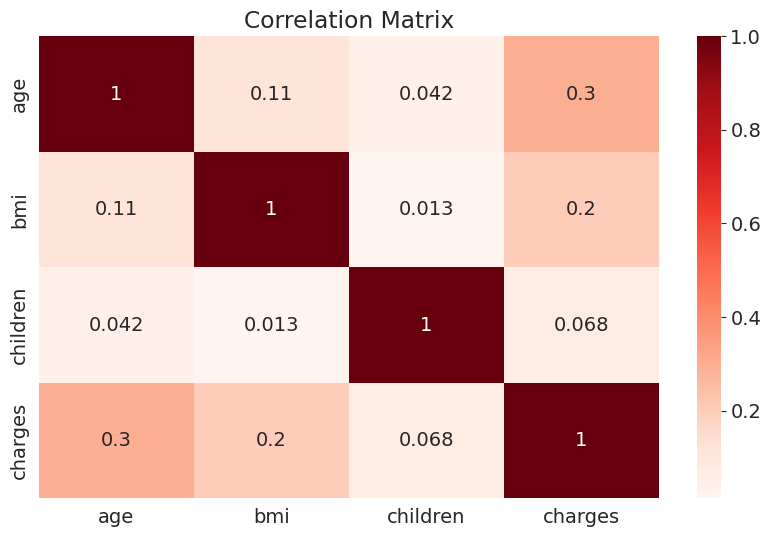

In [ ]:
sns.heatmap(numeric_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

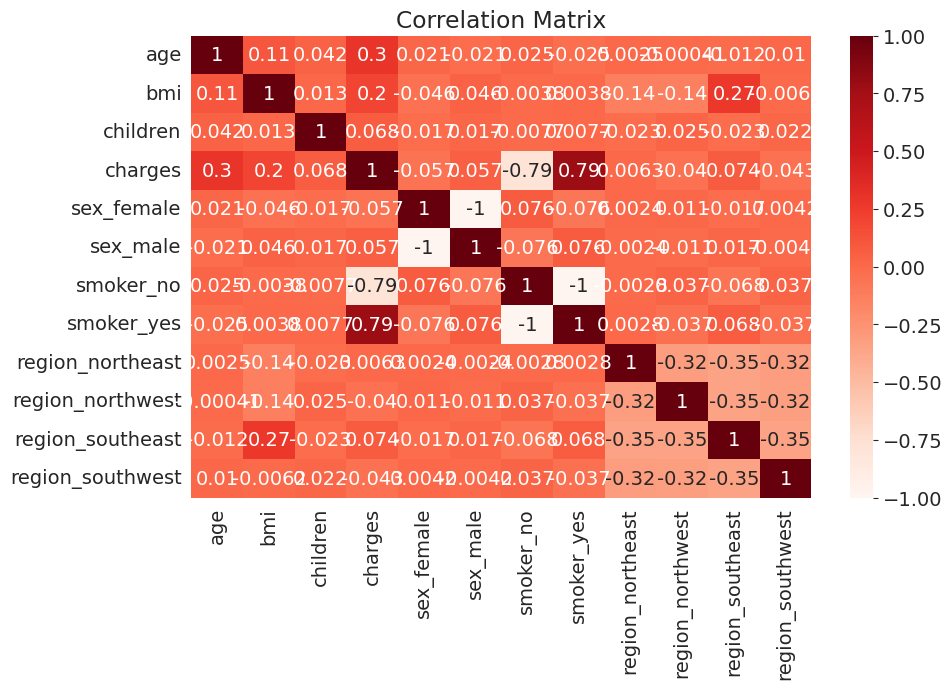

In [ ]:
sns.heatmap(medical_df_encoded.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

## Linear Regression using a Single feature

### Linear regression from scratch

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

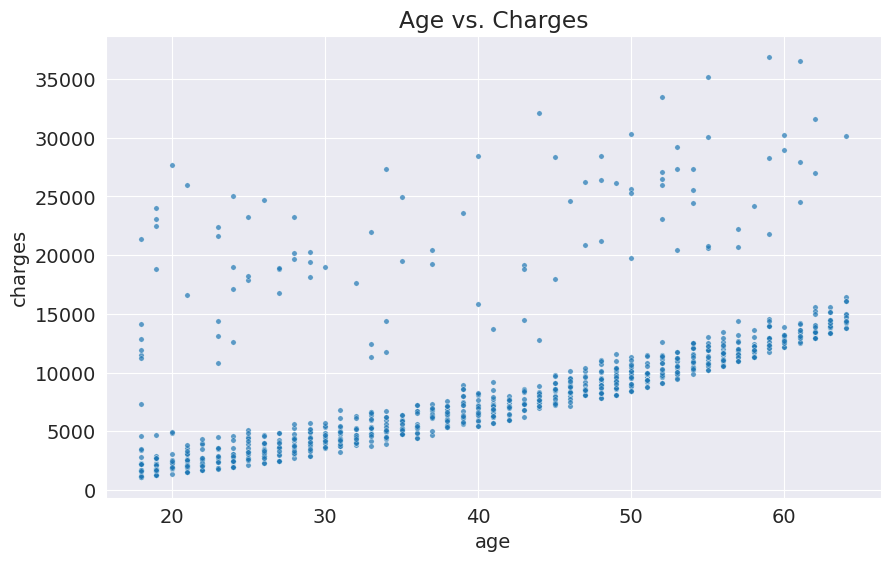

In [ ]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [ ]:
def estimate_charges(age, w, b):
    charges = w * age + b
    return charges

In [ ]:
w = 50
b = 100

In [ ]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [ ]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'Charges')

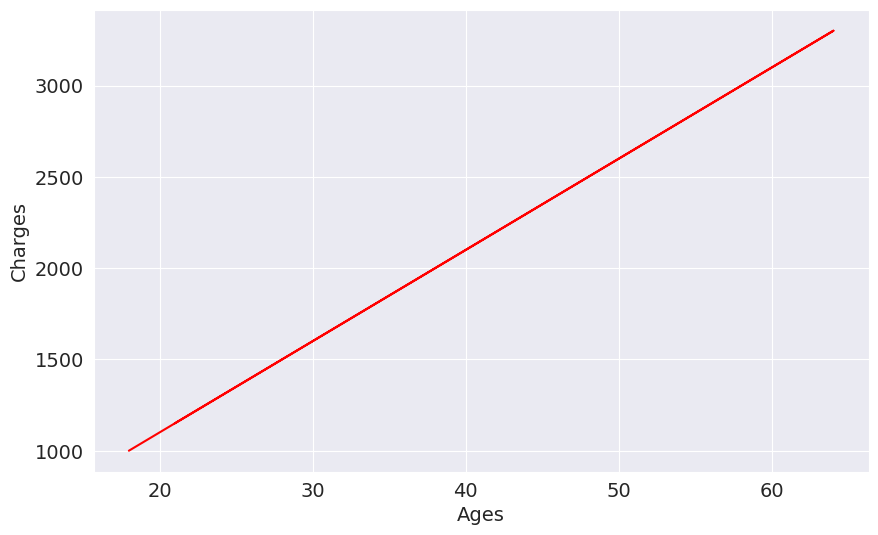

In [ ]:
plt.plot(ages, estimated_charges, 'r') # Change r to r-o, r--, r-+
plt.xlabel('Ages')
plt.ylabel('Charges')

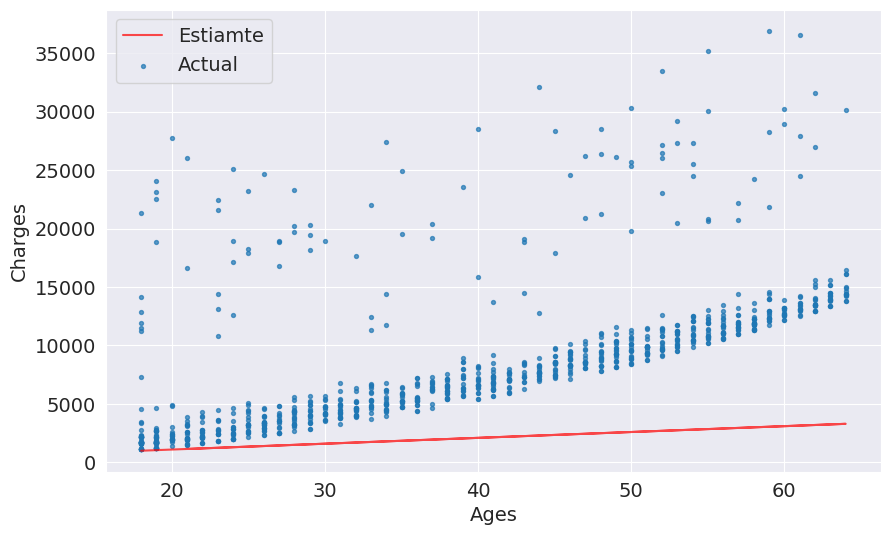

In [ ]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=.7)
plt.scatter(ages, target, s=8, alpha=.7)
plt.xlabel('Ages')
plt.ylabel('Charges')
plt.legend(['Estiamte', 'Actual'])

In [ ]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=.7)
    plt.scatter(ages, target, s=8, alpha=.7)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

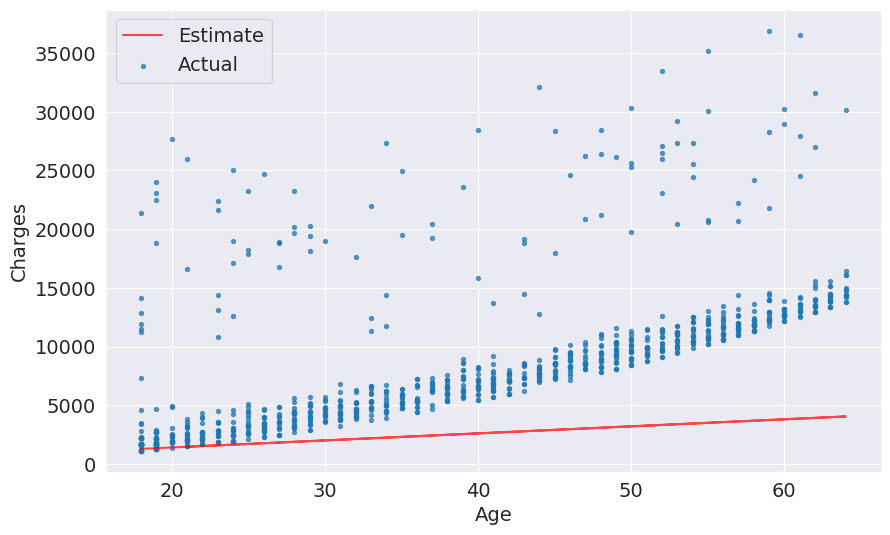

In [ ]:
try_parameters(60, 200)

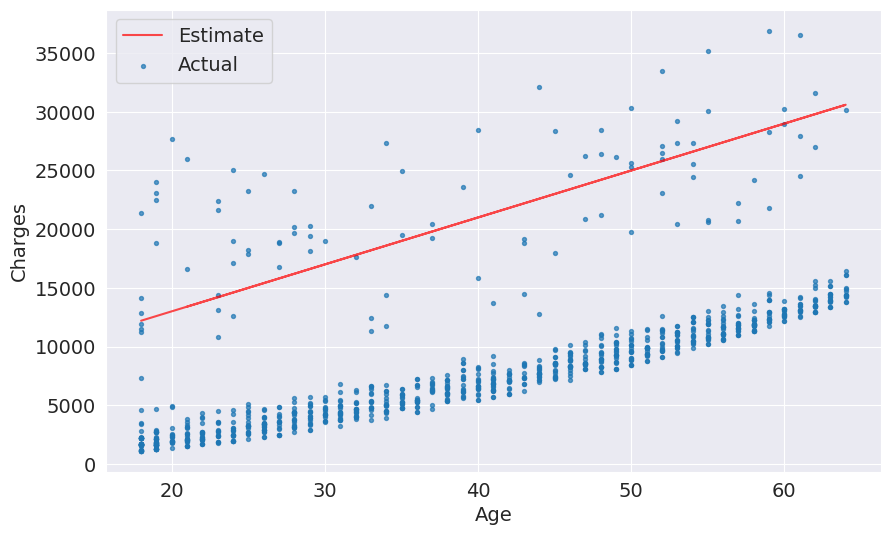

In [ ]:
try_parameters(400, 5000)

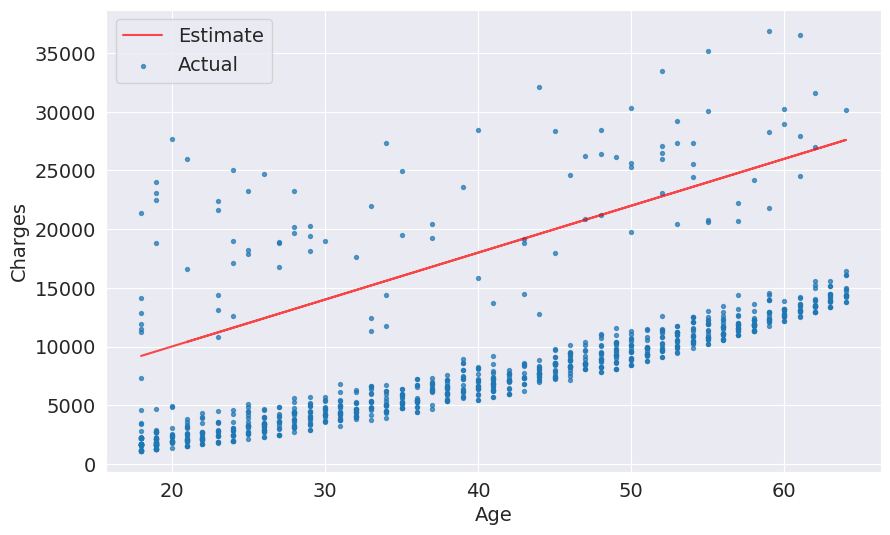

In [ ]:
try_parameters(400, 2000)

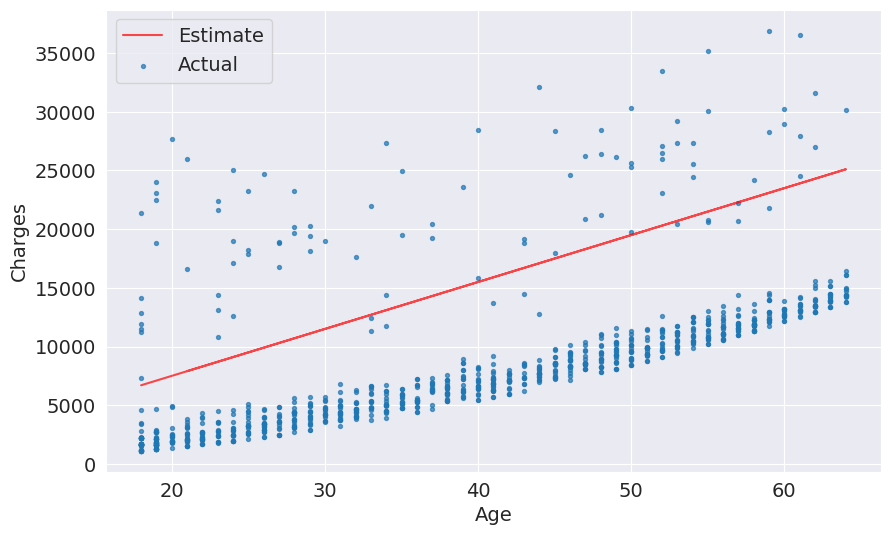

In [ ]:
try_parameters(400, -500)

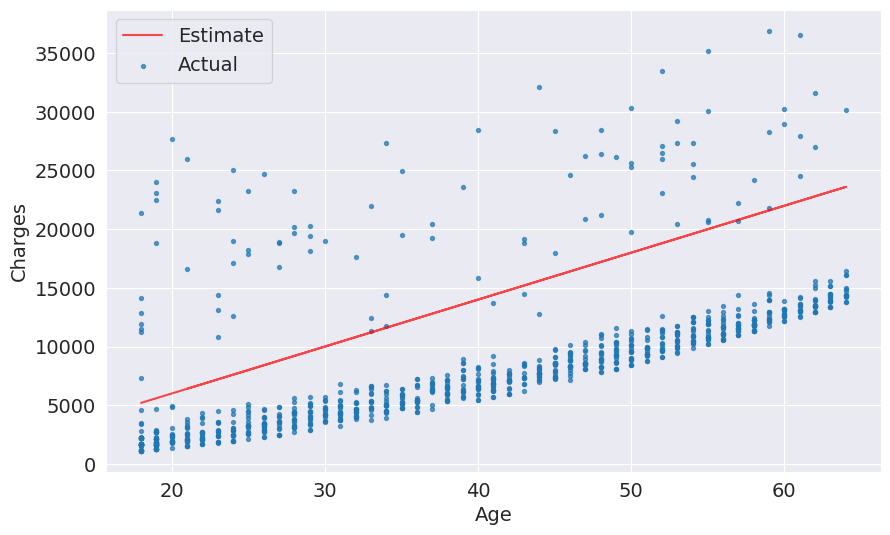

In [ ]:
try_parameters(400, -2000)

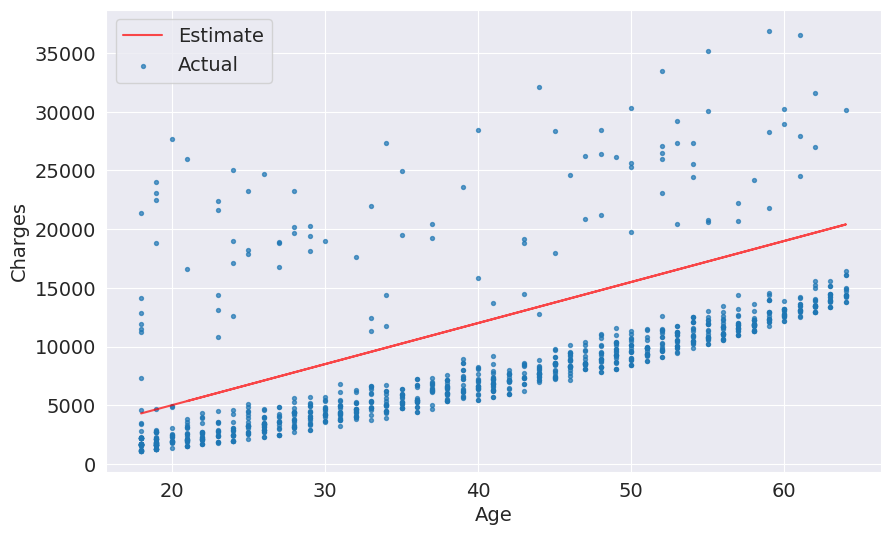

In [ ]:
try_parameters(350, -2000)

### Cost/Lost Function

In [ ]:
targets = non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [ ]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
w = 50
b = 100

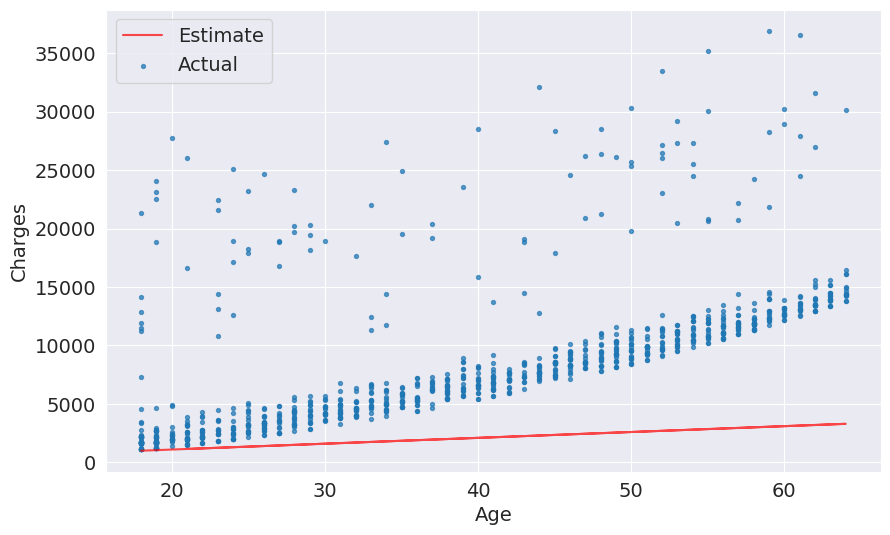

In [ ]:
try_parameters(w, b)

In [ ]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [ ]:
rmse(targets, predicted)

8461.949562575493

In [ ]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4991.993804156943


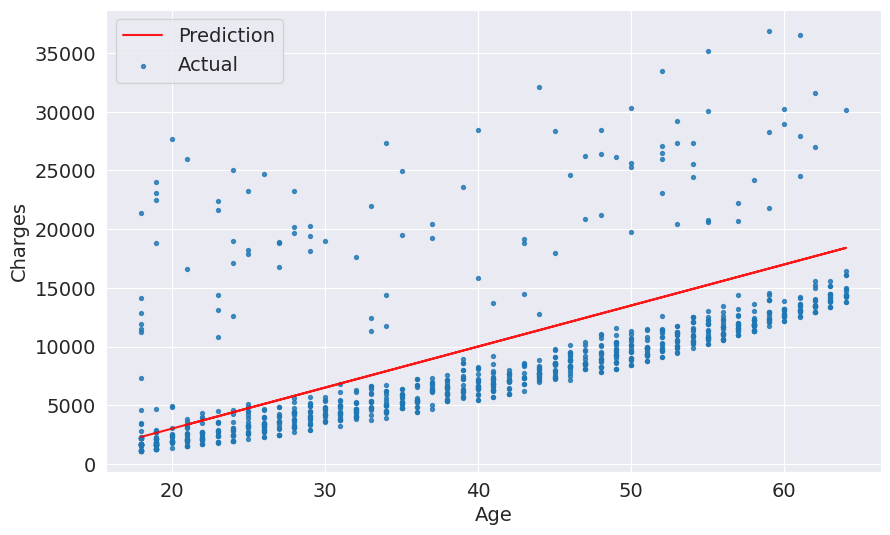

In [ ]:
try_parameters(350, -4000)

### Gradient Descent

In [ ]:
X = non_smoker_df[['age']]
y = non_smoker_df.charges

In [ ]:
X.shape

(1064, 1)

In [ ]:
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
X = X.astype(np.float128)
y = y.astype(np.float128)

In [ ]:
#Function to calculate the cost
def compute_cost(X, y, w, b):

    m = X.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * X[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [ ]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * X[i] + b
        dj_dw_i = (f_wb - y[i]) * X[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = compute_gradient(x, y, w , b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
    return w, b

In [ ]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 0.0001
# run gradient descent
w_final, b_final = gradient_descent(X, y, w_init, b_init, tmp_alpha, iterations)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

(w,b) found by gradient descent: ([225.10033756],[-219.44735852])


RMSE Loss:  4704.8806677463291903


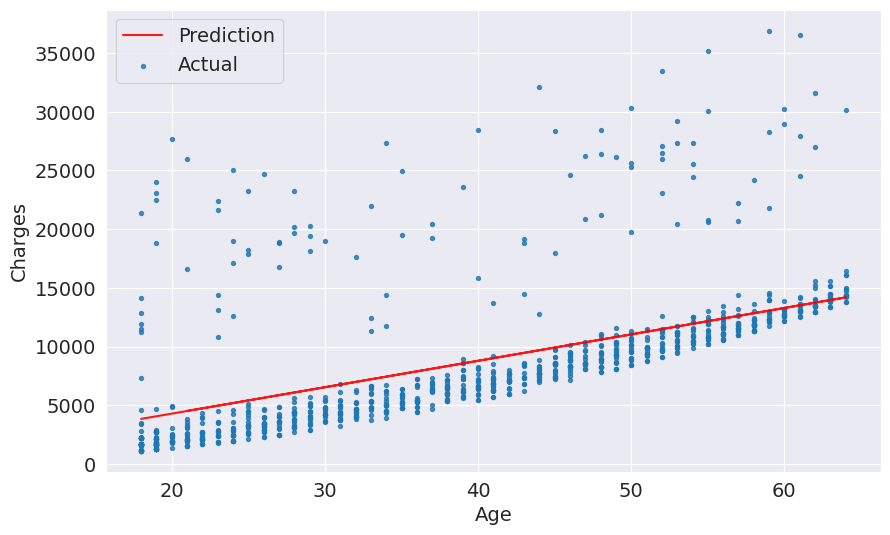

In [ ]:
try_parameters(w_final, b_final)

### Linear regression using Scikit-learn

In [ ]:
!pip install scikit-learn --quiet

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

In [ ]:
model.fit(inputs, targets)

LinearRegression()

In [ ]:
model.predict([[23], [37], [61]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
df = pd.DataFrame(predictions, columns = ['Charges'])
df

,Charges
0,2719.059874
1,5391.549003
2,6727.793567
3,6460.544654
4,6193.295741
...,...
1059,11805.522911
1060,11271.025085
1061,2719.059874
1062,2719.059874


In [ ]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [ ]:
rmse(targets, predictions)

4662.505766636395

In [ ]:
# Parameters
print(model.coef_)
print(model.intercept_)

[267.24891283]
-2091.4205565650864


RMSE Loss:  4662.505766636395


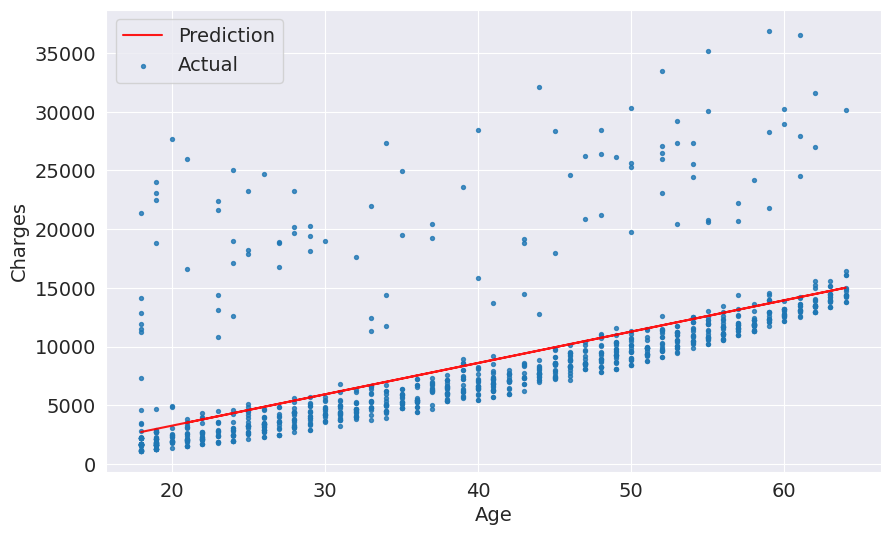

In [ ]:
try_parameters(model.coef_, model.intercept_)

### SGDRegression

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
model = SGDRegressor()

In [ ]:
model.fit(inputs, targets)

SGDRegressor()

In [ ]:
predictions = model.predict(inputs)

In [ ]:
predictions

array([ 240.08072388, 3305.50755476, 4838.22097019, ...,  240.08072388,
        240.08072388, 1159.70877314])

[306.54268309]
[-5277.68757169]
RMSE Loss:  4972.9415554387115


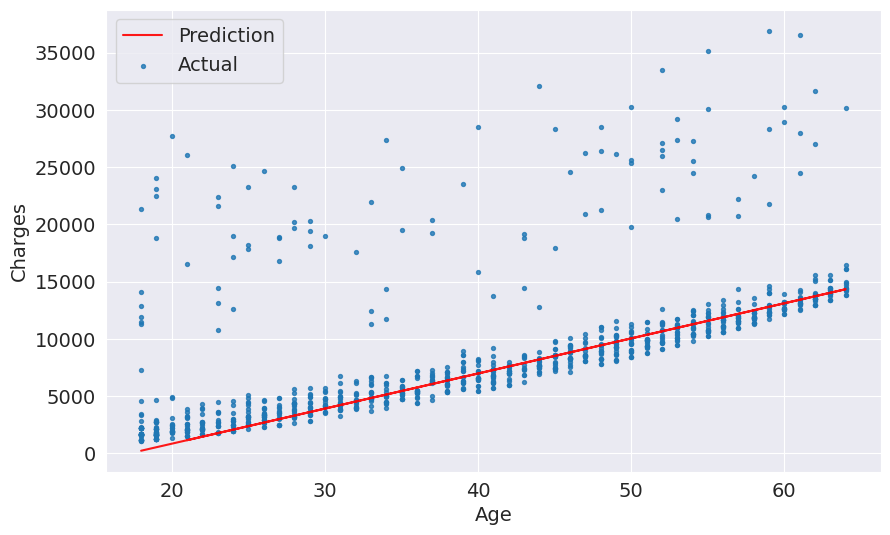

In [ ]:
print(model.coef_)
print(model.intercept_)
try_parameters(model.coef_, model.intercept_)

### Smoker

In [ ]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [ ]:
X = smoker_df[['age']]
y = smoker_df.charges

In [ ]:
X = X.to_numpy()
y = y.to_numpy()

Text(0, 0.5, 'Charges')

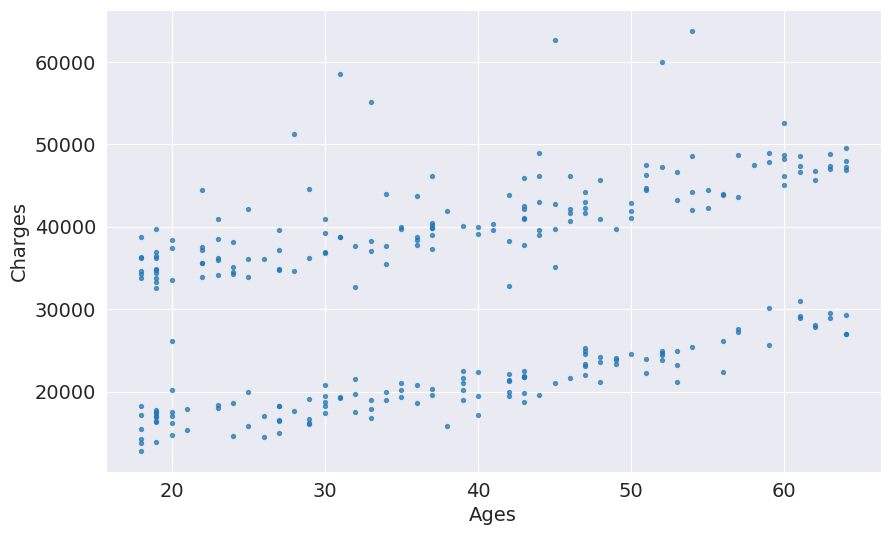

In [ ]:
plt.scatter(X, y, s=8, alpha=.7)
plt.xlabel('Ages')
plt.ylabel('Charges')

In [ ]:
w = 0
b = 0
epoch = 10000
alpha = 0.000001

w_final, b_final = gradient_descent(X, y, w, b, alpha, epoch)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

(w,b) found by gradient descent: ([770.54182153],[41.04927981])


In [ ]:
def try_parameters(w, b):
    ages = smoker_df.age
    target = smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  12727.221351631739


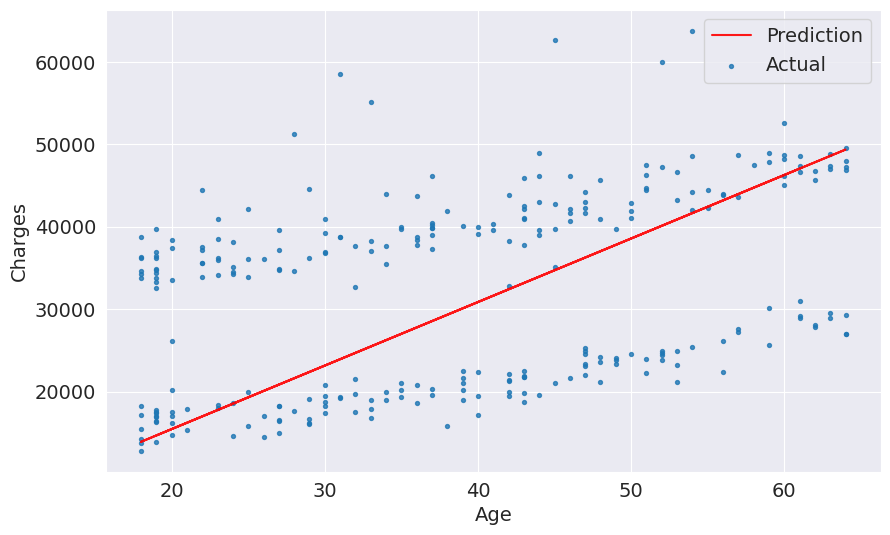

In [ ]:
try_parameters(w_final, b_final)

Linear regression

w = [305.23760211]
b = 20294.128126915966
RMSE Loss:  10711.00334810241


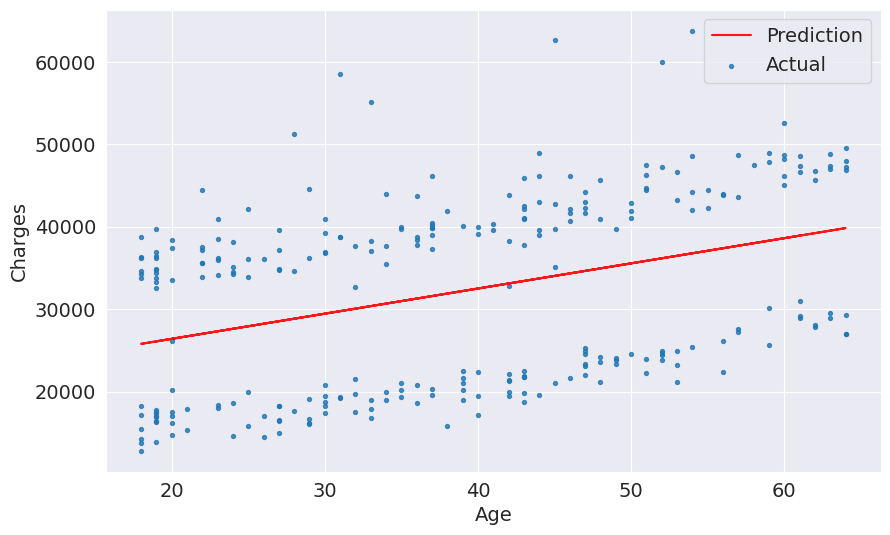

In [ ]:
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
print(f"w = {model.coef_}")
print(f"b = {model.intercept_}")
try_parameters(model.coef_, model.intercept_)

SGDRegression

w = [-3685034.32463847]
b = [-5.85497227e+09]
RMSE Loss:  5997150648.935422


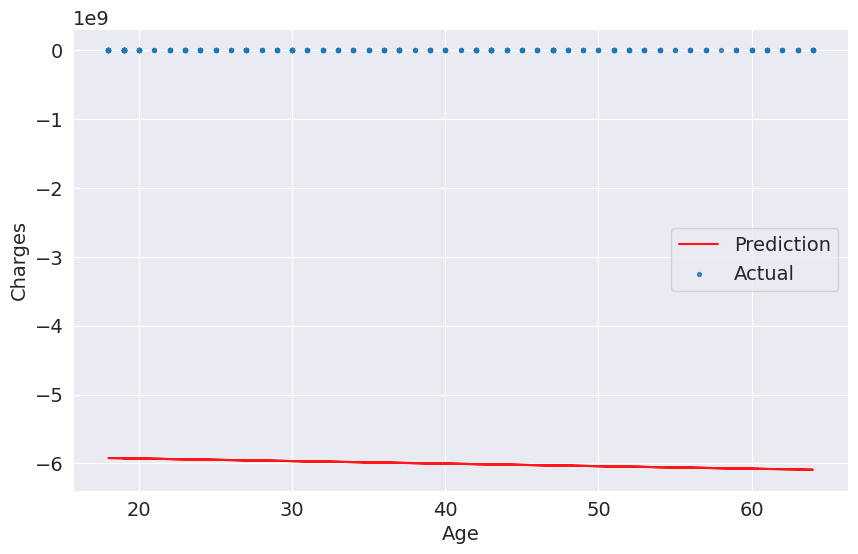

In [ ]:
model = SGDRegressor()
model.fit(X, y)
predictions = model.predict(X)
print(f"w = {model.coef_}")
print(f"b = {model.intercept_}")
try_parameters(model.coef_, model.intercept_)

The 3 graphs show three different visuliazation. The LinearRegression model is the usable but not practical. Here differnt features are influencing the data

## Linear Regression using Multiple Features

### $charges = w_1 * age + w_2 * bmi + b$

In [ ]:
inputs = non_smoker_df[['age', 'bmi']]
targets = non_smoker_df['charges']

In [ ]:
# LinearRegression
model = LinearRegression()
model.fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print(loss)

4662.3128354612945


In [ ]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [ ]:
fig = px.scatter(non_smoker_df,
                x='bmi',
                y='charges',
                hover_data=['sex', 'age'],
                title= 'BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.update_layout(
    width=1000,  # Set the width of the graph
    height=600   # Set the height of the graph
)
fig.show()

In [ ]:
fig = px.scatter_3d(non_smoker_df,
                x = 'age',
                y='bmi',
                z='charges')
fig.update_traces(marker_size=5, marker_opacity=0.7)
fig.update_layout(
    width=800,  # Set the width of the graph
    height=400   # Set the height of the graph
)
fig.show()

In [ ]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

In [ ]:
# Gradient Descent
inputs = non_smoker_df[['age', 'bmi']]
targets = non_smoker_df['charges']
inputs = inputs.to_numpy()
targets = targets.to_numpy()
w_in = [[0], [0]]
b_in = [0]
epoch = 10000
alpha = 0.00001

w_final, b_final = gradient_descent(inputs, targets, w_in, b_in, alpha, epoch)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

(w,b) found by gradient descent: ([[220.57917658 267.0493654 ]
 [220.57917658 267.0493654 ]],[[-18.64597629  30.29273698]
 [-18.64597629  30.29273698]])


In [ ]:
targets.shape

(1064,)

In [ ]:
b_final.shape

(2, 2)

In [ ]:
w_final.shape

(2, 2)

### Smoker

In [ ]:
inputs = smoker_df[['age', 'bmi']]
targets = smoker_df['charges']

In [ ]:
model = LinearRegression()
model.fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print(loss)

5722.782238884455


In [ ]:
smoker_df.charges.corr(smoker_df.bmi)

0.8064806070155404

In [ ]:
smoker_df.charges.corr(smoker_df.age)

0.36822444373077773

Text(0, 0.5, 'Charges')

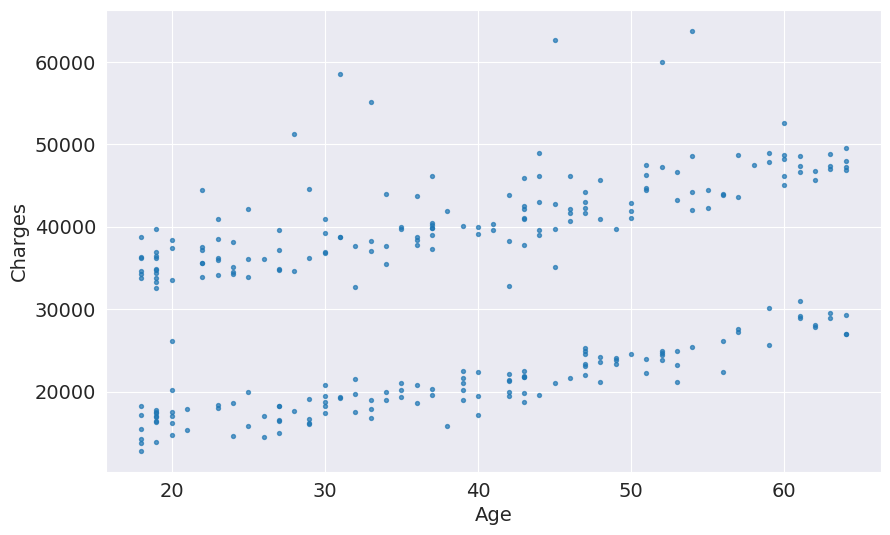

In [ ]:
plt.scatter(smoker_df.age, smoker_df.charges, s=8, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Charges')

Text(0, 0.5, 'Charges')

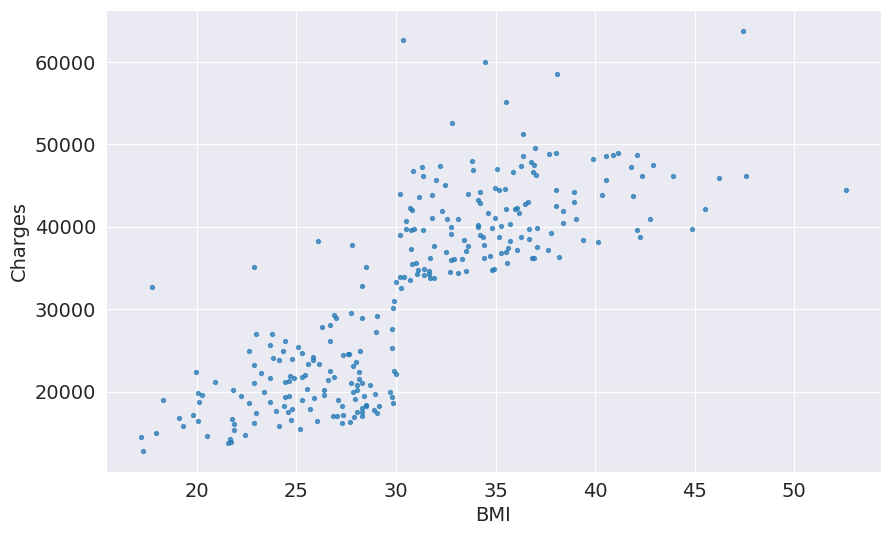

In [ ]:
plt.scatter(smoker_df.bmi, smoker_df.charges, s=8, alpha=0.7)
plt.xlabel('BMI')
plt.ylabel('Charges')

In [ ]:
fig = px.scatter_3d(smoker_df,
                x = 'age',
                y='bmi',
                z='charges')
fig.update_traces(marker_size=5, marker_opacity=0.7)
fig.update_layout(
    width=1000,  # Set the width of the graph
    height=600   # Set the height of the graph
)
fig.show()

### $charges = w_1 * age + w_2 * bmi + w_3 * children + b$

In [ ]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

In [ ]:
fig = px.strip(non_smoker_df,
               x='children',
               y='charges',
               title='Children vs. Charges')
fig.update_traces(marker_size=5, marker_opacity=0.8)
fig.update_layout(
    width=1000,  # Set the width of the graph
    height=600   # Set the height of the graph
)
fig.show()

In [ ]:
inputs= non_smoker_df[['age', 'bmi', 'children']]
targets = non_smoker_df['charges']
model = LinearRegression()
model.fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print(loss)

4608.470405038247


In [ ]:
model.coef_, model.intercept_

(array([265.2938443 ,   5.27956313, 580.65965053]), -2809.2976032235892)

In [ ]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=.7)
    plt.scatter(ages, target, s=8, alpha=.7)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

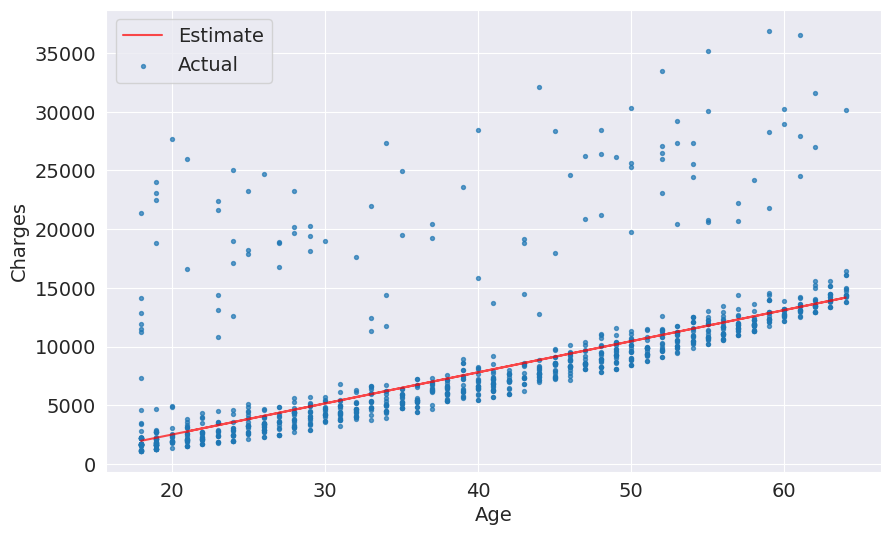

In [ ]:
try_parameters(model.coef_[0], model.intercept_)

### Smoker

In [ ]:
targets = smoker_df.charges
inputs = smoker_df[['age', 'bmi', 'children']]
model = LinearRegression()
model.fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print(loss)

5718.202480524154


In [ ]:
smoker_df.charges.corr(smoker_df.children)

0.03594500581268586

Text(0, 0.5, 'Charges')

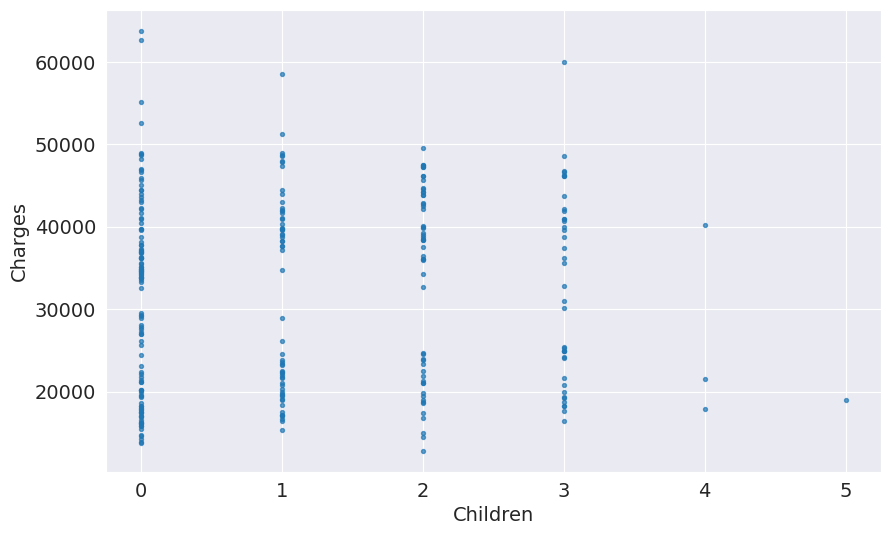

In [ ]:
plt.scatter(smoker_df.children, smoker_df.charges, s=8, alpha=0.7)
plt.xlabel('Children')
plt.ylabel('Charges')

### Entire data -- medical_df

In [ ]:
inputs = medical_df[['age', 'bmi', 'children']]
targets = medical_df.charges
model = LinearRegression()
model.fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print(loss)

11355.317901125973


In [ ]:
px.scatter(medical_df,
           x='age',
           y='charges',
           color='smoker',
           title='Age vs. Charges').update_layout(
    width=1000,  # Set the width of the graph
    height=600   # Set the height of the graph
)

## Using Categorical Features for ML

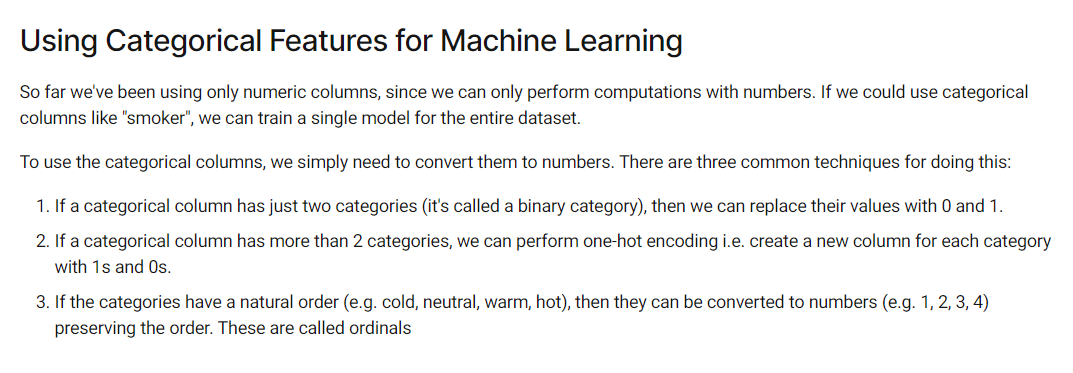

### Manual

<Axes: xlabel='smoker', ylabel='charges'>

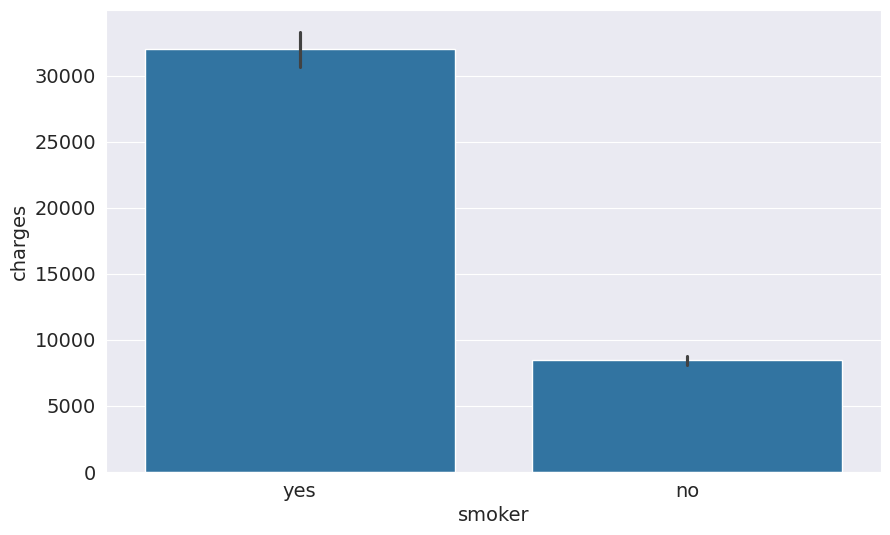

In [ ]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [ ]:
smoker_values = {'no': 0, 'yes': 1}
medical_df['smoker_numeric'] = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [ ]:
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_numeric
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


$charges = w_1 * age + w_2 * bmi + w_3 * children + w_4 * smoker + b$

In [ ]:
inputs = medical_df[['age', 'bmi', 'children', 'smoker_numeric']]
targets = medical_df.charges
model = LinearRegression()
model.fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print(loss)

6056.439217188081


In [ ]:
model.coef_, model.intercept_

(array([  257.84950728,   321.85140247,   473.50231561, 23811.3998446 ]),
 -12102.7693627279)

<Axes: xlabel='sex', ylabel='charges'>

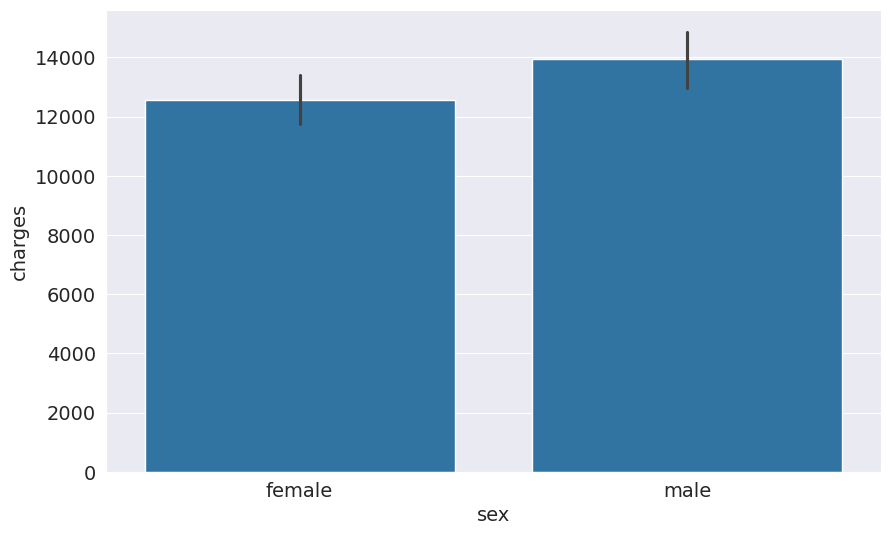

In [ ]:
sns.barplot(medical_df, x='sex', y='charges')

In [ ]:
sex_values = {'female': 0, 'male': 1}
medical_df['sex_numeric'] = medical_df.sex.map(sex_values)

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_numeric,sex_numeric
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [ ]:
medical_df.charges.corr(medical_df.sex_numeric)

0.057292062202025484

$charges = w_1 * age + w_2 * bmi + w_3 * children + w_4 * smoker + w_5 * sex + b$

In [ ]:
inputs = medical_df[['age', 'bmi', 'children', 'smoker_numeric', 'sex_numeric']]
targets = medical_df.charges
model = LinearRegression()
model.fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print(loss)

6056.100708754546


In [ ]:
model.coef_, model.intercept_

(array([  257.73498767,   322.36421449,   474.41112061, 23823.39253065,
         -128.63985357]),
 -12052.461985664737)

### One-hot Encoding

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_numeric,sex_numeric
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


<Axes: xlabel='region', ylabel='charges'>

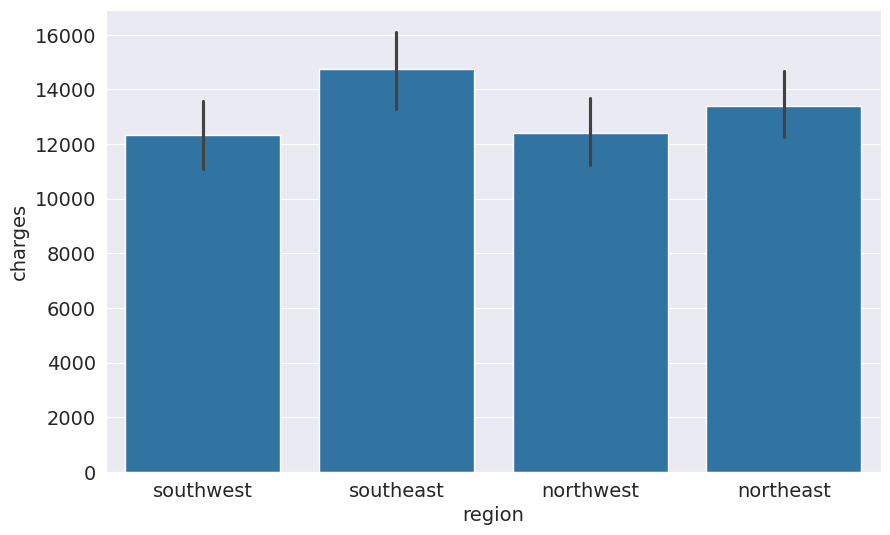

In [ ]:
sns.barplot(data=medical_df, x='region', y='charges')

In [ ]:
from sklearn import preprocessing

In [ ]:
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot = enc.transform(medical_df[['region']]).toarray()

In [ ]:
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_numeric,sex_numeric,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


$charges = w_1 * age + w_2 * bmi + w_3 * children + w_4 * smoker + w_5 * sex + w_6 * region + b$

In [ ]:
inputs = medical_df[['age', 'bmi', 'children', 'smoker_numeric', 'sex_numeric', 'northeast', 'northwest', 'southeast', 'southwest']]
targets = medical_df.charges

In [ ]:
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print(loss)

6041.6796511744515


In [ ]:
model.coef_, model.intercept_

(array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
         -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
         -373.04175627]),
 -12525.547811195444)

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges,smoker_numeric,sex_numeric,northeast,northwest,southeast,southwest
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
5,31,female,25.740,0,no,southeast,3756.62160,0,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,0,0,0.0,0.0,0.0,1.0
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0


In [ ]:
smoker_df = medical_df[medical_df.smoker == 'yes']
smoker_df

,age,sex,bmi,children,smoker,region,charges,smoker_numeric,sex_numeric,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
11,62,female,26.290,0,yes,southeast,27808.72510,1,0,0.0,0.0,1.0,0.0
14,27,male,42.130,0,yes,southeast,39611.75770,1,1,0.0,0.0,1.0,0.0
19,30,male,35.300,0,yes,southwest,36837.46700,1,1,0.0,0.0,0.0,1.0
23,34,female,31.920,1,yes,northeast,37701.87680,1,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600,1,0,0.0,0.0,0.0,1.0
1314,30,female,23.655,3,yes,northwest,18765.87545,1,0,0.0,1.0,0.0,0.0
1321,62,male,26.695,0,yes,northeast,28101.33305,1,1,1.0,0.0,0.0,0.0
1323,42,female,40.370,2,yes,southeast,43896.37630,1,0,0.0,0.0,1.0,0.0


In [ ]:
inputs = non_smoker_df[['age', 'bmi', 'children', 'smoker_numeric', 'sex_numeric', 'northeast', 'northwest', 'southeast', 'southwest']]
targets = non_smoker_df.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print(loss)
print(f"w: {model.coef_}")
print(f"b: {model.intercept_}")

4573.074988795492
w: [ 2.64481438e+02  1.89804618e+01  5.87458257e+02 -2.84217094e-14
 -5.25970487e+02  7.33683019e+02  1.85554256e+02 -2.58365372e+02
 -6.60871903e+02]
b: -2940.747154556304


In [ ]:
inputs = smoker_df[['age', 'bmi', 'children', 'smoker_numeric', 'sex_numeric', 'northeast', 'northwest', 'southeast', 'southwest']]
targets = smoker_df.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print(loss)
print(f"w: {model.coef_}")
print(f"b: {model.intercept_}")

5668.4678821121515
w: [ 2.67404386e+02  1.47554563e+03  1.82736551e+02  2.27373675e-13
 -3.88121649e+02  7.54585021e+02  6.48669959e+01 -1.13815350e+03
  3.18701480e+02]
b: -23426.354338758978


## Model Improvements

### Feature Scaling

In [ ]:
input_cols = ['age', 'bmi', 'children', 'smoker_numeric', 'sex_numeric', 'northeast', 'northwest', 'southeast', 'southwest']
inputs = medical_df[input_cols]
targets = medical_df.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print(loss)

6041.6796511744515


In [ ]:
model.coef_, model.intercept_

(array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
         -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
         -373.04175627]),
 -12525.547811195444)

In [ ]:
medical_df[input_cols].loc[10]

age               25.00
bmi               26.22
children           0.00
smoker_numeric     0.00
sex_numeric        1.00
northeast          1.00
northwest          0.00
southeast          0.00
southwest          0.00
Name: 10, dtype: float64

In [ ]:
model.predict([[28, 30, 2, 1, 0, 0, 1, 0, 0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29875.81463599])

In [ ]:
wights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
wights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_numeric,23848.534542
4,sex_numeric,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_numeric,sex_numeric,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_  # variance

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols = ['smoker_numeric', 'sex_numeric', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [ ]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_numeric,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_numeric,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [ ]:
new_customer = [[28, 30, 2, 1, 0, 0, 1, 0, 0]]
scaler.transform([[28, 30, 2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [ ]:
model.predict([[-0.79795355, -0.10882659,  0.75107928, 1, 0, 0, 1, 0, 0]])

array([29875.81463371])

## Creating a test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [ ]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 4953.212728980098


In [ ]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6152.6317722698595
